In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [124]:
import numpy as np
import pandas as pd 
import seaborn as sns
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

/home/trendydice/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [80]:
train = pd.read_csv('../Fakenews_detector/data/train.csv')
test = pd.read_csv('../Fakenews_detector/data/test.csv')

In [81]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [82]:
'train : ', train.shape
'test : ', test.shape

('train : ', (20800, 5))

('test : ', (5200, 4))

In [88]:
labels = train.label

In [89]:
train.label.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [17]:
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [34]:
x_train = train.iloc[:,:-1]

In [35]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [83]:
train = train.dropna()

In [86]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [109]:
x_train, x_test, y_train, y_test = train_test_split(train['text'], labels, test_size = 0.2, random_state = 7)

In [110]:
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(14628,)

(14628,)

(3657,)

(3657,)

In [111]:
#  inititalize the tfidf vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

In [112]:
train.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [113]:
# train['text'].dropna()

In [114]:
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [115]:
tfidf_train

<14628x144143 sparse matrix of type '<class 'numpy.float64'>'
	with 3953571 stored elements in Compressed Sparse Row format>

In [116]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [117]:
y_pred = pac.predict(tfidf_test)

In [118]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [125]:
cf = confusion_matrix(y_test, y_pred)

In [126]:
cf

array([[2016,   61],
       [  72, 1508]])

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2077
           1       0.96      0.95      0.96      1580

    accuracy                           0.96      3657
   macro avg       0.96      0.96      0.96      3657
weighted avg       0.96      0.96      0.96      3657



In [158]:
print('accuracy_score : ' , round(accuracy_score(y_test, y_pred)*100,3),  '%')

accuracy_score :  96.363 %


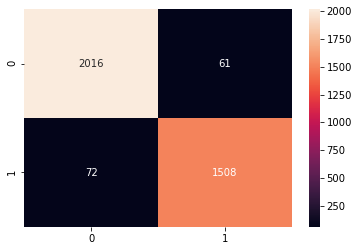

In [130]:
sns.heatmap(cf, annot=True, fmt='d')

In [133]:
x_test.shape

(3657,)

In [134]:
tfidf_test

<3657x144143 sparse matrix of type '<class 'numpy.float64'>'
	with 958318 stored elements in Compressed Sparse Row format>

In [137]:
test_pred = pac.predict(tfidf_test)

In [150]:
test_pred_df = pd.Series(test_pred)

In [151]:
type(test_pred_df)

pandas.core.series.Series

In [152]:
test_pred_df.value_counts()

0    2088
1    1569
dtype: int64